<a href="https://colab.research.google.com/github/abdipourasl/CNN/blob/main/projrct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('/content/drive/My Drive/Pics')
os.listdir('/content/drive/My Drive/Pics')

['norm', 'OCD']

In [4]:
data_dir= '/content/drive/My Drive/Pics'

In [5]:
os.listdir(os.path.join(data_dir,'OCD'))

['OCD_1.png',
 'OCD_2.png',
 'OCD_3.png',
 'OCD_4.png',
 'OCD_5.png',
 'OCD_6.png',
 'OCD_7.png',
 'OCD_8.png',
 'OCD_9.png',
 'OCD_10.png',
 'OCD_11.png',
 'OCD_12.png',
 'OCD_13.png',
 'OCD_14.png',
 'OCD_15.png',
 'OCD_16.png',
 'OCD_17.png',
 'OCD_18.png',
 'OCD_19.png',
 'OCD_20.png',
 'OCD_21.png',
 'OCD_22.png',
 'OCD_23.png',
 'OCD_24.png',
 'OCD_25.png',
 'OCD_26.png',
 'OCD_27.png',
 'OCD_28.png',
 'OCD_29.png',
 'OCD_30.png',
 'OCD_31.png',
 'OCD_32.png',
 'OCD_33.png',
 'OCD_34.png',
 'OCD_35.png',
 'OCD_36.png',
 'OCD_37.png',
 'OCD_38.png',
 'OCD_39.png',
 'OCD_40.png',
 'OCD_41.png',
 'OCD_42.png',
 'OCD_43.png',
 'OCD_44.png',
 'OCD_45.png',
 'OCD_46.png',
 'OCD_47.png',
 'OCD_48.png',
 'OCD_49.png',
 'OCD_50.png',
 'OCD_51.png',
 'OCD_52.png',
 'OCD_53.png',
 'OCD_54.png',
 'OCD_55.png',
 'OCD_56.png',
 'OCD_57.png',
 'OCD_58.png',
 'OCD_59.png',
 'OCD_60.png',
 'OCD_61.png',
 'OCD_62.png',
 'OCD_63.png',
 'OCD_64.png',
 'OCD_65.png',
 'OCD_66.png',
 'OCD_67.png',
 'OC

In [6]:
image_exts= [ 'jpeg','jpg','png','bmp']

In [7]:
img=cv2.imread(os.path.join('/content/drive/My Drive/Pics','OCD','OCD_855.png'))
img.shape


(630, 782, 3)

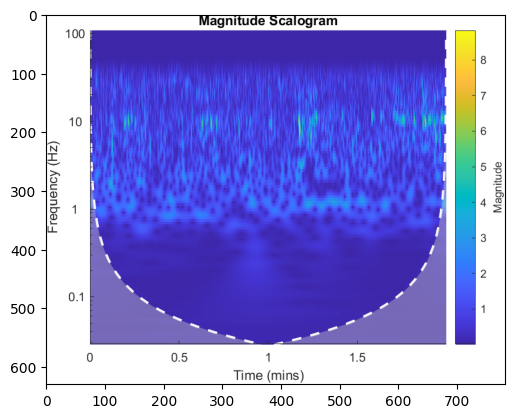

In [8]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img= cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print ('image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print ('issue with image {}'.format(image_path))

# Load Data:

In [10]:
import numpy as np

In [11]:
#tf.data.Dataset??

In [12]:
data= tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/Pics')

Found 1710 files belonging to 2 classes.


In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [13]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator= data.as_numpy_iterator()


In [15]:
batch=data_iterator.next()

In [16]:
batch[1]

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
batch[0].shape

(32, 256, 256, 3)

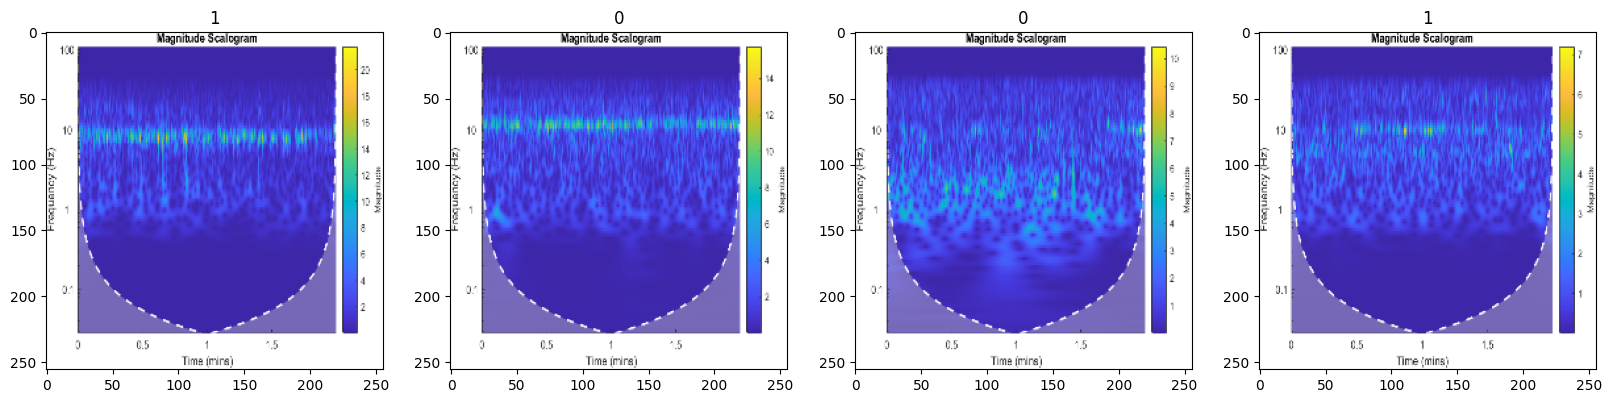

In [17]:
# 0 = norm
# 1 = OCD


fig,ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data:

In [18]:
data.as_numpy_iterator().next()

(array([[[[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         ...,
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.

In [19]:
data.as_numpy_iterator().next()[0].max()

255.0

In [20]:
data= data.map(lambda x,y:(x/255,y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [22]:
data.as_numpy_iterator().next()[0].max()

1.0

# Split Data:

In [23]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)


In [25]:
len(data)

54

In [26]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)


In [ ]:
len(train)

37

# Deep Learning Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [30]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [32]:
logdir='logs'

In [36]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
37/37 [==============================] - 105s 3s/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.4781
Epoch 2/20
37/37 [==============================] - 104s 3s/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6930 - val_accuracy: 0.5156
Epoch 3/20
37/37 [==============================] - 124s 3s/step - loss: 0.6931 - accuracy: 0.5101 - val_loss: 0.6930 - val_accuracy: 0.5219
Epoch 4/20
37/37 [==============================] - 105s 3s/step - loss: 0.6930 - accuracy: 0.5160 - val_loss: 0.6924 - val_accuracy: 0.5375
Epoch 5/20
37/37 [==============================] - 125s 3s/step - loss: 0.6931 - accuracy: 0.5068 - val_loss: 0.6928 - val_accuracy: 0.5188
Epoch 6/20
37/37 [==============================] - 124s 3s/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 7/20
37/37 [==============================] - 104s 3s/step - loss: 0.6933 - accuracy: 0.5008 - val_loss: 0.6936 - val_accuracy: 0.4875
Epoch 8/20
37

In [38]:
hist.history

{'loss': [0.6931616067886353,
  0.6931766271591187,
  0.6930847764015198,
  0.6929517984390259,
  0.6930725574493408,
  0.6931267976760864,
  0.6932687759399414,
  0.6931007504463196,
  0.6930763721466064,
  0.6932034492492676,
  0.6931996941566467,
  0.6931877136230469,
  0.693016767501831,
  0.6932653188705444,
  0.6932567358016968,
  0.6931397914886475,
  0.6932141780853271,
  0.6931976675987244,
  0.6931923031806946,
  0.6931260228157043],
 'accuracy': [0.5033783912658691,
  0.5016891956329346,
  0.5101351141929626,
  0.5160472989082336,
  0.5067567825317383,
  0.5050675868988037,
  0.5008445978164673,
  0.505912184715271,
  0.5076013803482056,
  0.5016891956329346,
  0.5016891956329346,
  0.5042229890823364,
  0.5109797120094299,
  0.5,
  0.5025337934494019,
  0.5042229890823364,
  0.5008445978164673,
  0.5,
  0.5008445978164673,
  0.5076013803482056],
 'val_loss': [0.6932855248451233,
  0.6930001974105835,
  0.6929575800895691,
  0.6924451589584351,
  0.6927706599235535,
  0.6930

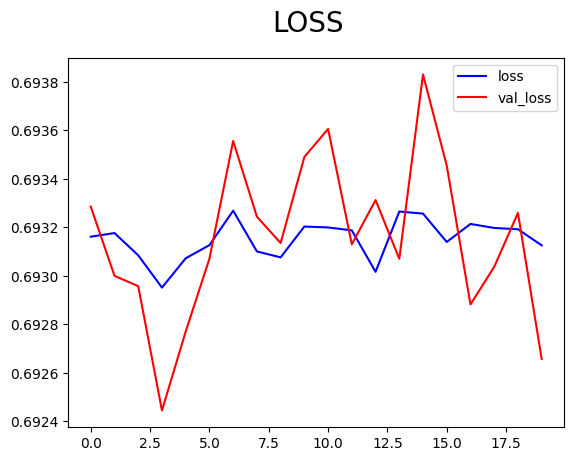

In [39]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('LOSS', fontsize=20)
plt.legend()
plt.show()

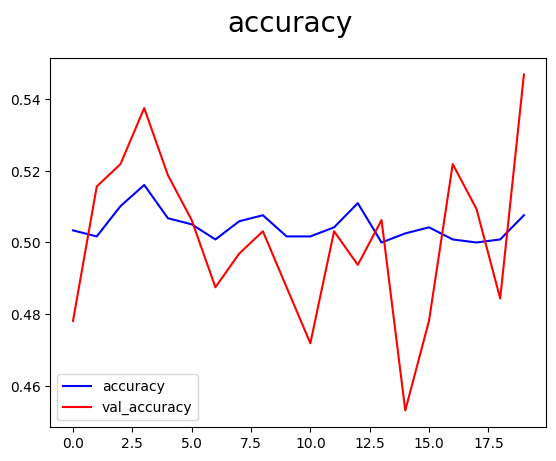

In [40]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend()
plt.show()

# Evaluate

In [41]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [42]:
pre = Precision()
re= Recall()
acc=BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 1s 929ms/step


In [44]:
print(f'Precision: {pre.result()} Recall: {re.result()}  Accuracy : {acc.result()} ')

Precision: 0.0 Recall: 0.0  Accuracy : 0.48124998807907104 
